In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
raw_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')

In [4]:
cols = ['offer_expiration', 'income_range', 'no_visited_Cold_drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital_Status', 'restaurant_type', 'age',
       'Prefer_western_over_chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks_regularly',
       'Customer_type', 'Qualification', 'is_foodie', 'no_Take_aways',
       'Job_JobIndustry', 'restuarant_opposite_direction_house',
       'has_Children', 'visit_restaurant_with_rating_avg', 'temperature',
       'Restaur_spend_greater_than20', 'Travel_Time', 'Climate',
       'drop_location', 'Prefer_home_food', 'Offer_Accepted']

In [5]:
raw_data.set_axis(cols, inplace = True, axis = 1)
print(f'raw train data shape:{raw_data.shape}')
raw_data.drop(['car','travelled_more_than_5mins_for_offer', 'Job_JobIndustry' ], axis =1, inplace = True)
print(f'new train data shape after droping 3 columns:{raw_data.shape}')
raw_data.no_visited_Cold_drinks.replace(to_replace = np.nan , value = 'less1' , inplace = True)
raw_data.Restaur_spend_less_than20.replace(to_replace = np.nan , value = '1~3' , inplace = True)
raw_data.no_visited_bars.replace(to_replace = np.nan , value = 'never' , inplace = True)
raw_data.no_Take_aways.replace(to_replace = np.nan , value = '1~3' , inplace = True)
raw_data.Restaur_spend_greater_than20.replace(to_replace = np.nan , value = 'less1' , inplace = True)
print(f'train data shape after dropping na  row values:{raw_data.shape}')

train_data_1 = raw_data.replace({'offer_expiration' : {'2days':48, '10hours':10},
    'income_range':{'Less than ₹12500':6250,'₹12500 - ₹24999':18750, '₹25000 - ₹37499':31250, '₹37500 - ₹49999':43750, '₹50000 - ₹62499':56250,
                                            '₹62500 - ₹74999':68750,'₹75000 - ₹87499':81250, '₹87500 - ₹99999':93750, '₹100000 or More':100000  }, 
                               'age': {'below21':16, '21':21, '26':26, '31':31,'36':36, '41':41,'46':46,'50plus':51},
                            'no_visited_Cold_drinks': {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                            'Restaur_spend_greater_than20' : {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                                 'no_Take_aways':{'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6}, 
                    'no_visited_bars': {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                                 'Restaur_spend_less_than20': {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                    'Offer_Accepted' : {'Yes':1, 'No':0}
                                
                            })

y = train_data_1.iloc[:, -1]
X = train_data_1.iloc[:,:-1]
print(f'X  shape:{X.shape}, y shape:{y.shape}')

train_data = pd.get_dummies(X)
print(f'traing data after applying get dummies fun:{train_data.shape}')

print(f'X  shape:{train_data.shape}, y shape:{y.shape}')

cols2 = ['offer_expiration', 'income_range', 'no_visited_Cold_drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'age', 'Prefer_western_over_chinese',
       'travelled_more_than_25mins_for_offer', 'no_visited_bars',
       'restuarant_same_direction_house', 'Cooks_regularly', 'is_foodie',
       'no_Take_aways', 'restuarant_opposite_direction_house', 'has_Children',
       'visit_restaurant_with_rating_avg', 'temperature',
       'Restaur_spend_greater_than20', 'Travel_Time', 'Prefer_home_food',
       'Marital_Status_Divorced', 'Marital_Status_Married partner',
       'Marital_Status_Single', 'Marital_Status_Unmarried partner',
       'Marital_Status_Widowed', 'restaurant_type_2 star restaurant',
       'restaurant_type_4 star restaurant', 'restaurant_type_Cold drinks',
       'restaurant_type_Restaurant with pub',
       'restaurant_type_Take-away restaurant', 'gender_Female', 'gender_Male',
       'Customer_type_Individual', 'Customer_type_With Colleagues',
       'Customer_type_With Family', 'Customer_type_With Kids',
       'Qualification_Associates degree', 'Qualification_Bachelors degree',
       'Qualification_Graduate degree (Masters or Doctorate)',
       'Qualification_High School Graduate', 'Qualification_Some High School',
       'Qualification_Some college - no degree', 'Climate_Spring',
       'Climate_Summer', 'Climate_Winter', 'drop_location_Location A',
       'drop_location_Location B', 'drop_location_Location C']

minmax = MinMaxScaler()
X_mm= minmax.fit(train_data)
X_mm = X_mm.transform(train_data)
print(f'X mm shape:{X_mm.shape}')

X = pd.DataFrame(X_mm, columns = cols2)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

raw train data shape:(12379, 31)
new train data shape after droping 3 columns:(12379, 28)
train data shape after dropping na  row values:(12379, 28)
X  shape:(12379, 27), y shape:(12379,)
traing data after applying get dummies fun:(12379, 48)
X  shape:(12379, 48), y shape:(12379,)
X mm shape:(12379, 48)


In [6]:
# raw_data.set_axis(cols, inplace = True, axis = 1)
# print(raw_data.shape)
# raw_data.drop(['car'], axis =1, inplace = True)
# print(raw_data.shape)
# train_data = raw_data.dropna()
# print(train_data.shape)
# train_data.Offer_Accepted.replace(to_replace = 'Yes', value = 1, inplace =True)
# train_data.Offer_Accepted.replace(to_replace = 'No', value = 0, inplace =True)
# train_data_dropna = train_data.dropna()
# print(train_data_dropna.shape)
# new_train =pd.get_dummies(train_data_dropna)
# print(new_train.shape)
# y = new_train['Offer_Accepted']
# X = new_train.drop(['Offer_Accepted'], axis = 1)
# print(X.shape, y.shape)

In [7]:
from sklearn.metrics import f1_score

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

!pip install xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV


In [9]:
#dummy classifier
dummy_classifier = DummyClassifier( random_state=42) 
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
print(f1_score(y_test, y_pred, average = 'macro'))
dummy_classifier.score(X_test, y_test)

0.35732825748399377


0.5560043080236942

In [10]:
def dummy_clf(X_train,X_test, y_train, y_test):
    dummy_clf = DummyClassifier(random_state = 42)
    dummy_clf.fit(X_train,y_train)
    y_predict = dummy_clf.predict(X_test)
    return(f'dummy clf f1_score:{{f1_score(y_test, y_predict, average = "weighted")}}')

def per_clf(X_train,X_test, y_train, y_test):
    per_clf = Perceptron(random_state = 42)
    per_clf.fit(X_train,y_train)
    y_predict = per_clf.predict(X_test)
    return(f'perceptron clf f1_score:{{f1_score(y_test, y_predict, average = "weighted")}}')

def SGD_clf(X_train,X_test, y_train, y_test):
  sgd_clf = SGDClassifier(random_state = 42)
  sgd_clf.fit(X_train, y_train)
  y_predict = sgd_clf.predict(X_test)
  return(f'SGD_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def logistic_clf(X_train,X_test, y_train, y_test):
  log_clf = SGDClassifier(random_state = 42)
  log_clf.fit(X_train, y_train)
  y_predict = log_clf.predict(X_test)
  return(f'logistic_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def ridge_clf(X_train,X_test, y_train, y_test):
  ridge_clf = RidgeClassifier(random_state = 42)
  ridge_clf.fit(X_train, y_train)
  y_predict = ridge_clf.predict(X_test)
  return(f'ridge_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def knn_clf(X_train,X_test, y_train, y_test):
  KNN_clf = KNeighborsClassifier()
  KNN_clf.fit(X_train, y_train)
  y_predict = KNN_clf.predict(X_test)
  return(f'KNN_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def linear_svc_clf(X_train,X_test, y_train, y_test):
  lin_svc_clf = LinearSVC(random_state = 42)
  lin_svc_clf.fit(X_train, y_train)
  y_predict = lin_svc_clf.predict(X_test)
  return(f'linear_svc_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def Nu_svc_clf(X_train,X_test, y_train, y_test):
  Nu_svc_clf = NuSVC(random_state = 42)
  Nu_svc_clf.fit(X_train, y_train)
  y_predict = Nu_svc_clf.predict(X_test)
  return(f'Nu_svc_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def svc_clf(X_train,X_test, y_train, y_test):
  svc_clf = SVC(random_state = 42)
  svc_clf.fit(X_train, y_train)
  y_predict = svc_clf.predict(X_test)
  return(f'SVC_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def decision_tree_clf(X_train,X_test, y_train, y_test):
  dt_clf = DecisionTreeClassifier(random_state = 42)
  dt_clf.fit(X_train, y_train)
  y_predict = dt_clf.predict(X_test)
  return(f'Decision_tress_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def random_forest_clf(X_train,X_test, y_train, y_test):
  rfc_clf = RandomForestClassifier(random_state = 42)
  rfc_clf.fit(X_train, y_train)
  y_predict = rfc_clf.predict(X_test)
  return(f'Random_forest_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def AdaBoost_clf(X_train,X_test, y_train, y_test):
  AbaB_clf = AdaBoostClassifier(random_state = 42)
  AbaB_clf.fit(X_train, y_train)
  y_predict = AbaB_clf.predict(X_test)
  return(f'AdaBoost_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def GradientBoost_clf(X_train,X_test, y_train, y_test):
  GrB_clf = GradientBoostingClassifier(random_state = 42)
  GrB_clf.fit(X_train, y_train)
  y_predict = GrB_clf.predict(X_test)
  return(f'GradientBoost_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

def XGB_clf(X_train,X_test, y_train, y_test):
  xgb_clf = XGBClassifier(random_state = 42)
  xgb_clf.fit(X_train, y_train)
  y_predict = xgb_clf.predict(X_test)
  return(f'XGBoost_classifier _f1_score: {f1_score(y_test, y_predict, average = "weighted")}')

In [11]:
print(dummy_clf(X_train,X_test,y_train, y_test))
print(per_clf(X_train,X_test,y_train, y_test))
print(SGD_clf(X_train,X_test,y_train, y_test))
print(logistic_clf(X_train,X_test,y_train, y_test))
print(ridge_clf(X_train,X_test,y_train, y_test))
print(knn_clf(X_train,X_test,y_train, y_test))
print(linear_svc_clf(X_train,X_test,y_train, y_test))
print(Nu_svc_clf(X_train,X_test,y_train, y_test))
print(svc_clf(X_train,X_test,y_train, y_test))
print(decision_tree_clf(X_train,X_test,y_train, y_test))
print(random_forest_clf(X_train,X_test,y_train, y_test))
print(AdaBoost_clf(X_train,X_test,y_train, y_test))
print(GradientBoost_clf(X_train,X_test,y_train, y_test))
print(XGB_clf(X_train,X_test,y_train, y_test))

dummy clf f1_score:{f1_score(y_test, y_predict, average = "weighted")}
perceptron clf f1_score:{f1_score(y_test, y_predict, average = "weighted")}
SGD_classifier _f1_score: 0.5024161018023635
logistic_classifier _f1_score: 0.5024161018023635
ridge_classifier _f1_score: 0.5830366487328589
KNN_classifier _f1_score: 0.5692433887253409
linear_svc_classifier _f1_score: 0.5830366487328589
Nu_svc_classifier _f1_score: 0.5621624014536457
SVC_classifier _f1_score: 0.5912768764913169
Decision_tress_classifier _f1_score: 0.545367479809025
Random_forest_classifier _f1_score: 0.6024292244529041
AdaBoost_classifier _f1_score: 0.5892692026231676
GradientBoost_classifier _f1_score: 0.6003596125692878
XGBoost_classifier _f1_score: 0.5962825024798967


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc_ohc= RandomForestClassifier( max_depth = 17,random_state=42)
rfc_ohc.fit(X_train, y_train)

print(rfc_ohc.score(X_test, y_test))
rfc_ohc.score(X_train, y_train)

0.628163704900377


1.0

In [14]:
y_pred1 = rfc_ohc.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48      1649
           1       0.63      0.82      0.71      2065

    accuracy                           0.63      3714
   macro avg       0.63      0.60      0.60      3714
weighted avg       0.63      0.63      0.61      3714



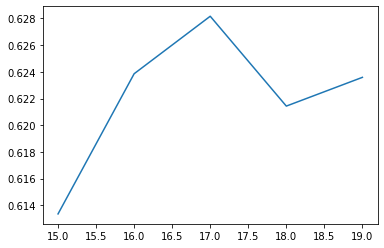

In [15]:
scoress = []
plt.figure()
for depth in np.arange(15,20):
  rfc= RandomForestClassifier(max_depth=depth, random_state=42)
  rfc.fit(X_train, y_train)
  scoress.append(rfc.score(X_test, y_test))
  
  #plt.xlabel(depth)
  #plt.ylabel(rfc.score(X_test, y_test))

x,Y = np.arange(15,20),scoress 
plt.plot(x,Y)
plt.show()

In [16]:
test_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

In [17]:
cols_1 = ['offer_expiration', 'income_range', 'no_visited_Cold_drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital_Status', 'restaurant_type', 'age',
       'Prefer_western_over_chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks_regularly',
       'Customer_type', 'Qualification', 'is_foodie', 'no_Take_aways',
       'Job_JobIndustry', 'restuarant_opposite_direction_house',
       'has_Children', 'visit_restaurant_with_rating_avg', 'temperature',
       'Restaur_spend_greater_than20', 'Travel_Time', 'Climate',
       'drop_location', 'Prefer_home_food']

In [18]:
test_data.set_axis(cols_1, inplace = True, axis = 1)
print(f'raw train data shape:{test_data.shape}')
test_data.drop(['car','travelled_more_than_5mins_for_offer', 'Job_JobIndustry' ], axis =1, inplace = True)
print(f'new test data shape after droping 3 columns:{test_data.shape}')
test_data.no_visited_Cold_drinks.replace(to_replace = np.nan , value = 'less1' , inplace = True)
test_data.Restaur_spend_less_than20.replace(to_replace = np.nan , value = '1~3' , inplace = True)
test_data.no_visited_bars.replace(to_replace = np.nan , value = 'never' , inplace = True)
test_data.no_Take_aways.replace(to_replace = np.nan , value = '1~3' , inplace = True)
test_data.Restaur_spend_greater_than20.replace(to_replace = np.nan , value = 'less1' , inplace = True)
print(f'test data shape after dropping na  row values:{test_data.shape}')

test_data = test_data.replace({'offer_expiration' : {'2days':48, '10hours':10},
    'income_range':{'Less than ₹12500':6250,'₹12500 - ₹24999':18750, '₹25000 - ₹37499':31250, '₹37500 - ₹49999':43750, '₹50000 - ₹62499':56250,
                                            '₹62500 - ₹74999':68750,'₹75000 - ₹87499':81250, '₹87500 - ₹99999':93750, '₹100000 or More':100000  }, 
                               'age': {'below21':16, '21':21, '26':26, '31':31,'36':36, '41':41,'46':46,'50plus':51},
                            'no_visited_Cold_drinks': {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                            'Restaur_spend_greater_than20' : {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                                 'no_Take_aways':{'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6}, 
                    'no_visited_bars': {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                                 'Restaur_spend_less_than20': {'less1':1, '1~3':3, 'never':0, 'gt8':8, '4~8':6},
                    
                                
                            })

X_test_data = pd.get_dummies(test_data)
print(f'traing data after applying get dummies fun:{X_test_data.shape}')

minmax = MinMaxScaler()
X_test_mm = minmax.fit_transform(X_test_data)
print(f'X mm shape:{X_test_mm.shape}')
X_test_mm = pd.DataFrame(X_test_mm, columns = cols2)

y_predict = rfc_ohc.predict(X_test_mm)
output = pd.DataFrame()
output['Id'] = output.index
output['Offer_Accepted'] = pd.DataFrame(y_predict)
output['Id'] = output.index
output.Offer_Accepted.replace(to_replace = 1 , value = 'Yes' , inplace = True)
output.Offer_Accepted.replace(to_replace = 0 , value = 'No' , inplace = True)
output.set_axis(['Id' , 'Offer Accepted'], axis =1, inplace = True)
output.to_csv('submission.csv' , index =False)

raw train data shape:(5305, 30)
new test data shape after droping 3 columns:(5305, 27)
test data shape after dropping na  row values:(5305, 27)
traing data after applying get dummies fun:(5305, 48)
X mm shape:(5305, 48)
